# Computer Vision Challenge

Welcome to the Data Intelligence Computer Vision Challenge! Please make sure you have read and understood the README - We recommend reading this through a few times before starting. To help you visualise the data we have provided a basic medical image viewer below. You do not have to use this and you are free to edit it if you wish. 

Good Luck! And remember you have 3 days to complete this challenge, after which you should zip this folder and send it back to us. 

In [12]:
import os

import numpy as np
import matplotlib.pyplot as plt

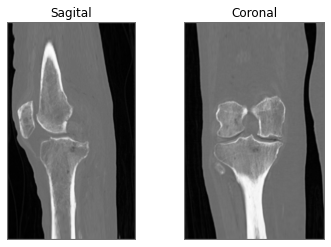

In [13]:
def medical_image_viewer(volume):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(np.flip(volume[volume.shape[0]//2, :, :].T, 0), cmap="Greys_r")
    ax1.title.set_text('Sagital')
    ax1.axis('Off')

    ax2.imshow(np.flip(volume[:, volume.shape[1]//2, :].T, 0), cmap="Greys_r")
    ax2.title.set_text('Coronal')
    ax1.axis('Off')
    plt.axis('Off')

A_CT = np.load(os.path.join(os.getcwd(), 'PatientA/CT_ICF.npy'))
A_seg = np.load(os.path.join(os.getcwd(), 'PatientA/Segmentation_ICF.npy'))
medical_image_viewer(A_CT)

Import the necessary libararies:

In [14]:
import numpy as np
import six
import json
# image handling
import SimpleITK as sitk
# feature extraction
import radiomics
from radiomics import firstorder, glcm, glrlm, glszm, shape
# statistical feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import warnings
warnings.filterwarnings('ignore')

# Feature extraction
Radiomic features can be divided into these groups: size and shape based–features, descriptors of the image intensity histogram, descriptors of the relationships between image voxels (e.g. gray-level co-occurrence matrix (GLCM), run length matrix (RLM), size zone matrix (SZM), and neighborhood gray tone difference matrix (NGTDM) derived textures, textures extracted from filtered images, and fractal features.


In [15]:
class Biomarkers:
    def print_features(self, features):
        for i in features.items():
            print(i)
        print("\n")

    def features_distance(self, features1, features2):
        for f1, f2 in zip(features1.items(), features2.items()):
            print(f1[0], f1[1] - f2[1])
        print("\n")

    def extract_features(self, image, mask, feature_list):
        features = {}
        if 'FirstOrder' in feature_list:
            first_order_features = radiomics.firstorder.RadiomicsFirstOrder(image, mask)
            first_order_features.disableAllFeatures()
            first_order_features.enableAllFeatures()  # On the feature class level, all features are disabled by default.
            _first_order_features = first_order_features.execute()
            features.update(dict((key, val) for (key, val) in six.iteritems(_first_order_features)))
        if 'Shape' in feature_list:
            shape_features = shape.RadiomicsShape(image, mask)
            shape_features.enableAllFeatures()
            _shape_features = shape_features.execute()
            features.update(dict((key, val) for (key, val) in six.iteritems(_shape_features)))
        if 'GLCM' in feature_list:
            glcm_features = glcm.RadiomicsGLCM(image, mask)
            glcm_features.enableAllFeatures()
            _glcm_features = glcm_features.execute()
            features.update(dict((key, val) for (key, val) in six.iteritems(_glcm_features)))
        if 'GLRLM' in feature_list:
            glrlm_features = glrlm.RadiomicsGLRLM(image, mask)
            glrlm_features.enableAllFeatures()
            _glrlm_features = glrlm_features.execute()
            features.update(dict((key, val) for (key, val) in six.iteritems(_glrlm_features)))
        if 'GLSZM' in feature_list:
            glszm_features = glszm.RadiomicsGLSZM(image, mask)
            glszm_features.enableAllFeatures()
            _glszm_features = glszm_features.execute()
            features.update(dict((key, val) for (key, val) in six.iteritems(_glszm_features)))
        # self.print_features(features)
        return features

    

Now using the class Biomarkers, we can extract the features.

In [16]:
# reading the scans and segmentations 
A_CT = np.load('PatientA/CT_ICF.npy')
A_seg = np.load('PatientA/Segmentation_ICF.npy')
B_CT = np.load('PatientB/CT_ICF.npy')
B_seg = np.load('PatientB/Segmentation_ICF.npy')

Making simpleITK format from the images.

In [17]:
sitk_A_ct = sitk.GetImageFromArray(A_CT.astype(np.float32))
sitk_A_seg = sitk.GetImageFromArray(A_seg.astype(np.uint8))

sitk_B_ct = sitk.GetImageFromArray(B_CT.astype(np.float32))
sitk_B_seg = sitk.GetImageFromArray(B_seg.astype(np.uint8))


# write the sitk formats for the furture use
sitk.WriteImage(sitk_A_ct, 'PatientA/sitk_imgs/CT.mha')
sitk.WriteImage(sitk_A_seg, 'PatientA/sitk_imgs/seg.mha')
sitk.WriteImage(sitk_B_ct, 'PatientB/sitk_imgs/CT.mha')
sitk.WriteImage(sitk_B_seg, 'PatientB/sitk_imgs/seg.mha')


Extracting features using Pyradiomics library.

In [18]:
# instantiate from Biomarkers
biomarkers = Biomarkers()
# define the features 
radiomic_features = ['FirstOrder', 'Shape', 'GLCM', 'GLRLM', 'GLSZM'] 
# extract biomarker features for patiant A and B
A_features = biomarkers.extract_features(sitk_A_ct, sitk_A_seg, radiomic_features)
B_features = biomarkers.extract_features(sitk_B_ct, sitk_B_seg, radiomic_features)

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


In [20]:
print(A_features)


{'10Percentile': array(24.30211906), '90Percentile': array(1083.3213501), 'Energy': array(1.55190024e+11), 'Entropy': array(5.16334243), 'InterquartileRange': array(279.76132202), 'Kurtosis': array(5.33768394), 'Maximum': array(1824.01550293), 'MeanAbsoluteDeviation': array(300.673256), 'Mean': array(327.59545013), 'Median': array(162.75935364), 'Minimum': array(-347.953125), 'Range': array(2171.96862793), 'RobustMeanAbsoluteDeviation': array(155.64246082), 'RootMeanSquared': array(529.4780748), 'Skewness': array(1.83263045), 'TotalEnergy': array(1.55190024e+11), 'Uniformity': array(0.04329261), 'Variance': array(173028.25275144), 'Elongation': 0.5183078848949202, 'Flatness': 0.3982767708566759, 'LeastAxisLength': 73.10603302745824, 'MajorAxisLength': 183.5558545636753, 'Maximum2DDiameterColumn': array(192.78226059), 'Maximum2DDiameterRow': array(121.16517652), 'Maximum2DDiameterSlice': array(192.03385118), 'Maximum3DDiameter': array(193.8478785), 'MeshVolume': array(553381.95833333), 

ANOVA feature selection for numeric input and categorical output.

In [21]:
# no of features should be selected
no_extracted_features = 10

# make the data vector from the features of both patients
data = [[i.item() if type(i) == np.ndarray else i for i in list(A_features.values())]]
data.append(list([i.item() if type(i) == np.ndarray else i for i in list(A_features.values())]))

# make the label vector
label = np.array([0, 1])

# run ANOVA feature selection
fs = SelectKBest(score_func=f_classif, k=no_extracted_features)
X_selected = fs.fit_transform(data, label)

# find the name of selected features 
selected_features = []
for i in range(no_extracted_features):
    indx = np.argwhere(data[0] == X_selected[0][i])
    selected_features.append(list(A_features.keys())[indx[0][0]])
print(selected_features)

['LargeAreaLowGrayLevelEmphasis', 'LowGrayLevelZoneEmphasis', 'SizeZoneNonUniformity', 'SizeZoneNonUniformityNormalized', 'SmallAreaEmphasis', 'SmallAreaHighGrayLevelEmphasis', 'SmallAreaLowGrayLevelEmphasis', 'ZoneEntropy', 'ZonePercentage', 'ZoneVariance']


# Surgery plan
Define class SurgeryPlan for planning the surgery.

In [22]:

class SurgeryPlan:
    def transform_cutting_plane(self, pth, CT_ICF):
        '''
        This function transforms the cutting plane coordinates from the robot coordinate frame (RCF)
        to image coordinate frame (ICF)
        :param pth: path to the patient data
        :return:
            scaled_translated_cutting_plane: scaled and transformed cutting plane to image coordinate frame (ICF)
            ct_shape: shape of the CT
        '''
        with open(pth + '/ICF_to_RCF_transform.json','r') as f:
            ICF_to_RCF_transform = json.load(f)
        
        # do translation
        translated_cutting_plane = CT_ICF + np.tile(ICF_to_RCF_transform['Offsets'], (4, 1))
        
        # do scaling
        scaled_translated_cutting_plane = [np.transpose(np.matmul(np.diag(np.reciprocal(ICF_to_RCF_transform['Scales'])), np.transpose(i)))
                                           for i in  translated_cutting_plane]
        scaled_translated_cutting_plane = np.int32(scaled_translated_cutting_plane)

        # get the shape of CT scan
        ct_shape = np.load(pth + '/CT_ICF.npy').shape
        return ct_shape, scaled_translated_cutting_plane


    def binary_cutting_plane(self, shape, cutting_vertices):
        '''
        This function returns a 3D binary mask of the cutting plane in ICF
        :param shape: shape of the binary mask (same as the CT shape)
        :param cutting_vertices: the vertices of the cutting plane in image coordinate frame (ICF)
        :return:
        '''
        
        # the equation of a hyper-plane with 3 points of A,B,C:
        # AB=B-A
        # AC=C-A
        # np.cross(AB,AC) = (a,b,c)
        # (a*A_x + b*A_y + c*A_z)+d=0

        cutting_plane = np.zeros(shape)
        V12 = cutting_vertices[0] - cutting_vertices[2]
        V13 = cutting_vertices[1] - cutting_vertices[2]
        a, b, c = np.cross(V12,V13) #cross product returns the coefficents of the hyper-plane
        d = -(a * cutting_vertices[0][0] + b * cutting_vertices[0][1] + c * cutting_vertices[0][2]) # the constant of the hyper-palne

        #make the binary mask
        for x in range(0,shape[0]):
            for y in range(0,shape[1]):
                for z in range(0,shape[2]):
                    if a * x + b * y + c * z + d > 0: #the equation of the hyper-plane
                        cutting_plane[x, y, z] = 1
        return cutting_plane


    def remove_remain_bone(self,  pth):
        CT_ICF = sitk.ReadImage(pth + '/sitk_imgs/CT.mha')
        Seg = sitk.ReadImage(pth + '/sitk_imgs/seg.mha')
        cutting_plane = sitk.ReadImage(pth + '/sitk_imgs/cutting_plane.mha')
        filter = sitk.MultiplyImageFilter()
        
        # mask ct with the cutting plane
        masked_ct_cutting_plane = filter.Execute(CT_ICF, sitk.Cast(cutting_plane, sitk.sitkFloat32))
        
        # extract bone by masking the CT and segmentation
        bone = filter.Execute(CT_ICF, sitk.Cast(Seg, sitk.sitkFloat32))
        
        # removed bone by filtering the bone and cutting plane
        removed_bone = sitk.Cast(filter.Execute(bone, sitk.Cast(cutting_plane, sitk.sitkFloat32)), sitk.sitkFloat32)
        
        # remained bone by filtering the bone and not of cutting plane
        not_filter = sitk.BinaryNotImageFilter()
        remained_bone = filter.Execute(bone, sitk.Cast(not_filter.Execute(sitk.Cast(cutting_plane, sitk.sitkUInt8)),
                                                       sitk.sitkFloat32))
        
        sitk.WriteImage(removed_bone, pth + '/sitk_imgs/removed_bone.mha')
        sitk.WriteImage(remained_bone, pth + '/sitk_imgs/remained_bone.mha')
        return removed_bone, remained_bone


## Patient A surgery plan

In [23]:
# instantiate from class SurgeryPlan
surgery_plan = SurgeryPlan()

In [24]:
# make binary mask cutting plane for patient A
pth = 'PatientA'
A_CT_ICF = np.loadtxt(pth + '/cutting_plane_RCF.txt')
ct_shape, A_scaled_translated_cutting_plane = surgery_plan.transform_cutting_plane(pth=pth, CT_ICF=A_CT_ICF)
A_cutting_plane = surgery_plan.binary_cutting_plane(shape=ct_shape, 
                                                    cutting_vertices=A_scaled_translated_cutting_plane)

# store the cutting plane mask
sitk.WriteImage(sitk.GetImageFromArray(A_cutting_plane), pth + '/sitk_imgs/cutting_plane.mha')

In [74]:
# get removed and remained bone for patient A
A_removed_bone, A_remained_bone = surgery_plan.remove_remain_bone(pth=pth)


## Patient B surgery plan

In [75]:
 # make binary mask for patient B
pth = 'PatientB'
B_CT_ICF = np.loadtxt(pth + '/cutting_plane_RCF.txt')
ct_shape, B_scaled_translated_cutting_plane = surgery_plan.transform_cutting_plane(pth=pth, CT_ICF=B_CT_ICF)
B_cutting_plane = surgery_plan.binary_cutting_plane(shape=ct_shape, 
                                                    cutting_vertices=B_scaled_translated_cutting_plane)

# store the cutting plane mask
sitk.WriteImage(sitk.GetImageFromArray(B_cutting_plane), pth + '/sitk_imgs/cutting_plane.mha')

In [76]:
# get removed and remained bone for patient B
B_removed_bone, B_remained_bone = surgery_plan.remove_remain_bone(pth=pth)

## Decision on if the removed and remained bones are diseased and healthy

In [77]:
# features for removed bone of patient A
A_removed_bone_binary_mask = make_binary_make(A_removed_bone)
A_removed_features = biomarkers.extract_features(A_removed_bone, A_removed_bone_binary_mask, radiomic_features)

# features for remained bone of patient A
A_remained_bone_binary_mask = make_binary_make(A_remained_bone)
A_remained_features = biomarkers.extract_features(A_remained_bone, A_remained_bone_binary_mask, radiomic_features)

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


In [78]:
# features for removed bone of patient B
B_removed_bone_binary_mask = make_binary_make(B_removed_bone)
B_removed_features = biomarkers.extract_features(B_removed_bone, B_removed_bone_binary_mask, radiomic_features)
# features for remained bone of patient B
B_remained_bone_binary_mask = make_binary_make(B_remained_bone)
B_remained_features = biomarkers.extract_features(B_remained_bone, B_remained_bone_binary_mask, radiomic_features)

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


Calculating the correlation coefficients. 

To decide if the removed and remained bones are healthy/diseased, we calculate the correlation between the remained/removed area with the segmentation. 

In [11]:
from scipy.stats.stats import pearsonr   
selected_remained_features_A = [A_remained_features[f] for f in selected_features]
print(pearsonr(selected_remained_features_A, X_selected[0, :]))

selected_removed_features_A = [A_removed_features[f] for f in selected_features]
print(pearsonr(selected_removed_features_A, X_selected[0, :]))

NameError: name 'selected_features' is not defined

In [98]:
selected_remained_features_B = [B_remained_features[f] for f in selected_features]
print(pearsonr(selected_remained_features_B, X_selected[0, :]))

selected_removed_features_B = [B_removed_features[f] for f in selected_features]
print(pearsonr(selected_removed_features_B, X_selected[0, :]))

(0.9965781886360193, 5.973349230159287e-10)
(0.9641135006747038, 6.9482600530521195e-06)


Since the remained bones and the extracted feature from the segmentation are correlated, the patients are not good candidate for the joint replacement, since there still is diseased bone in the patient body.